# Model Evaluation on Candy Dataset

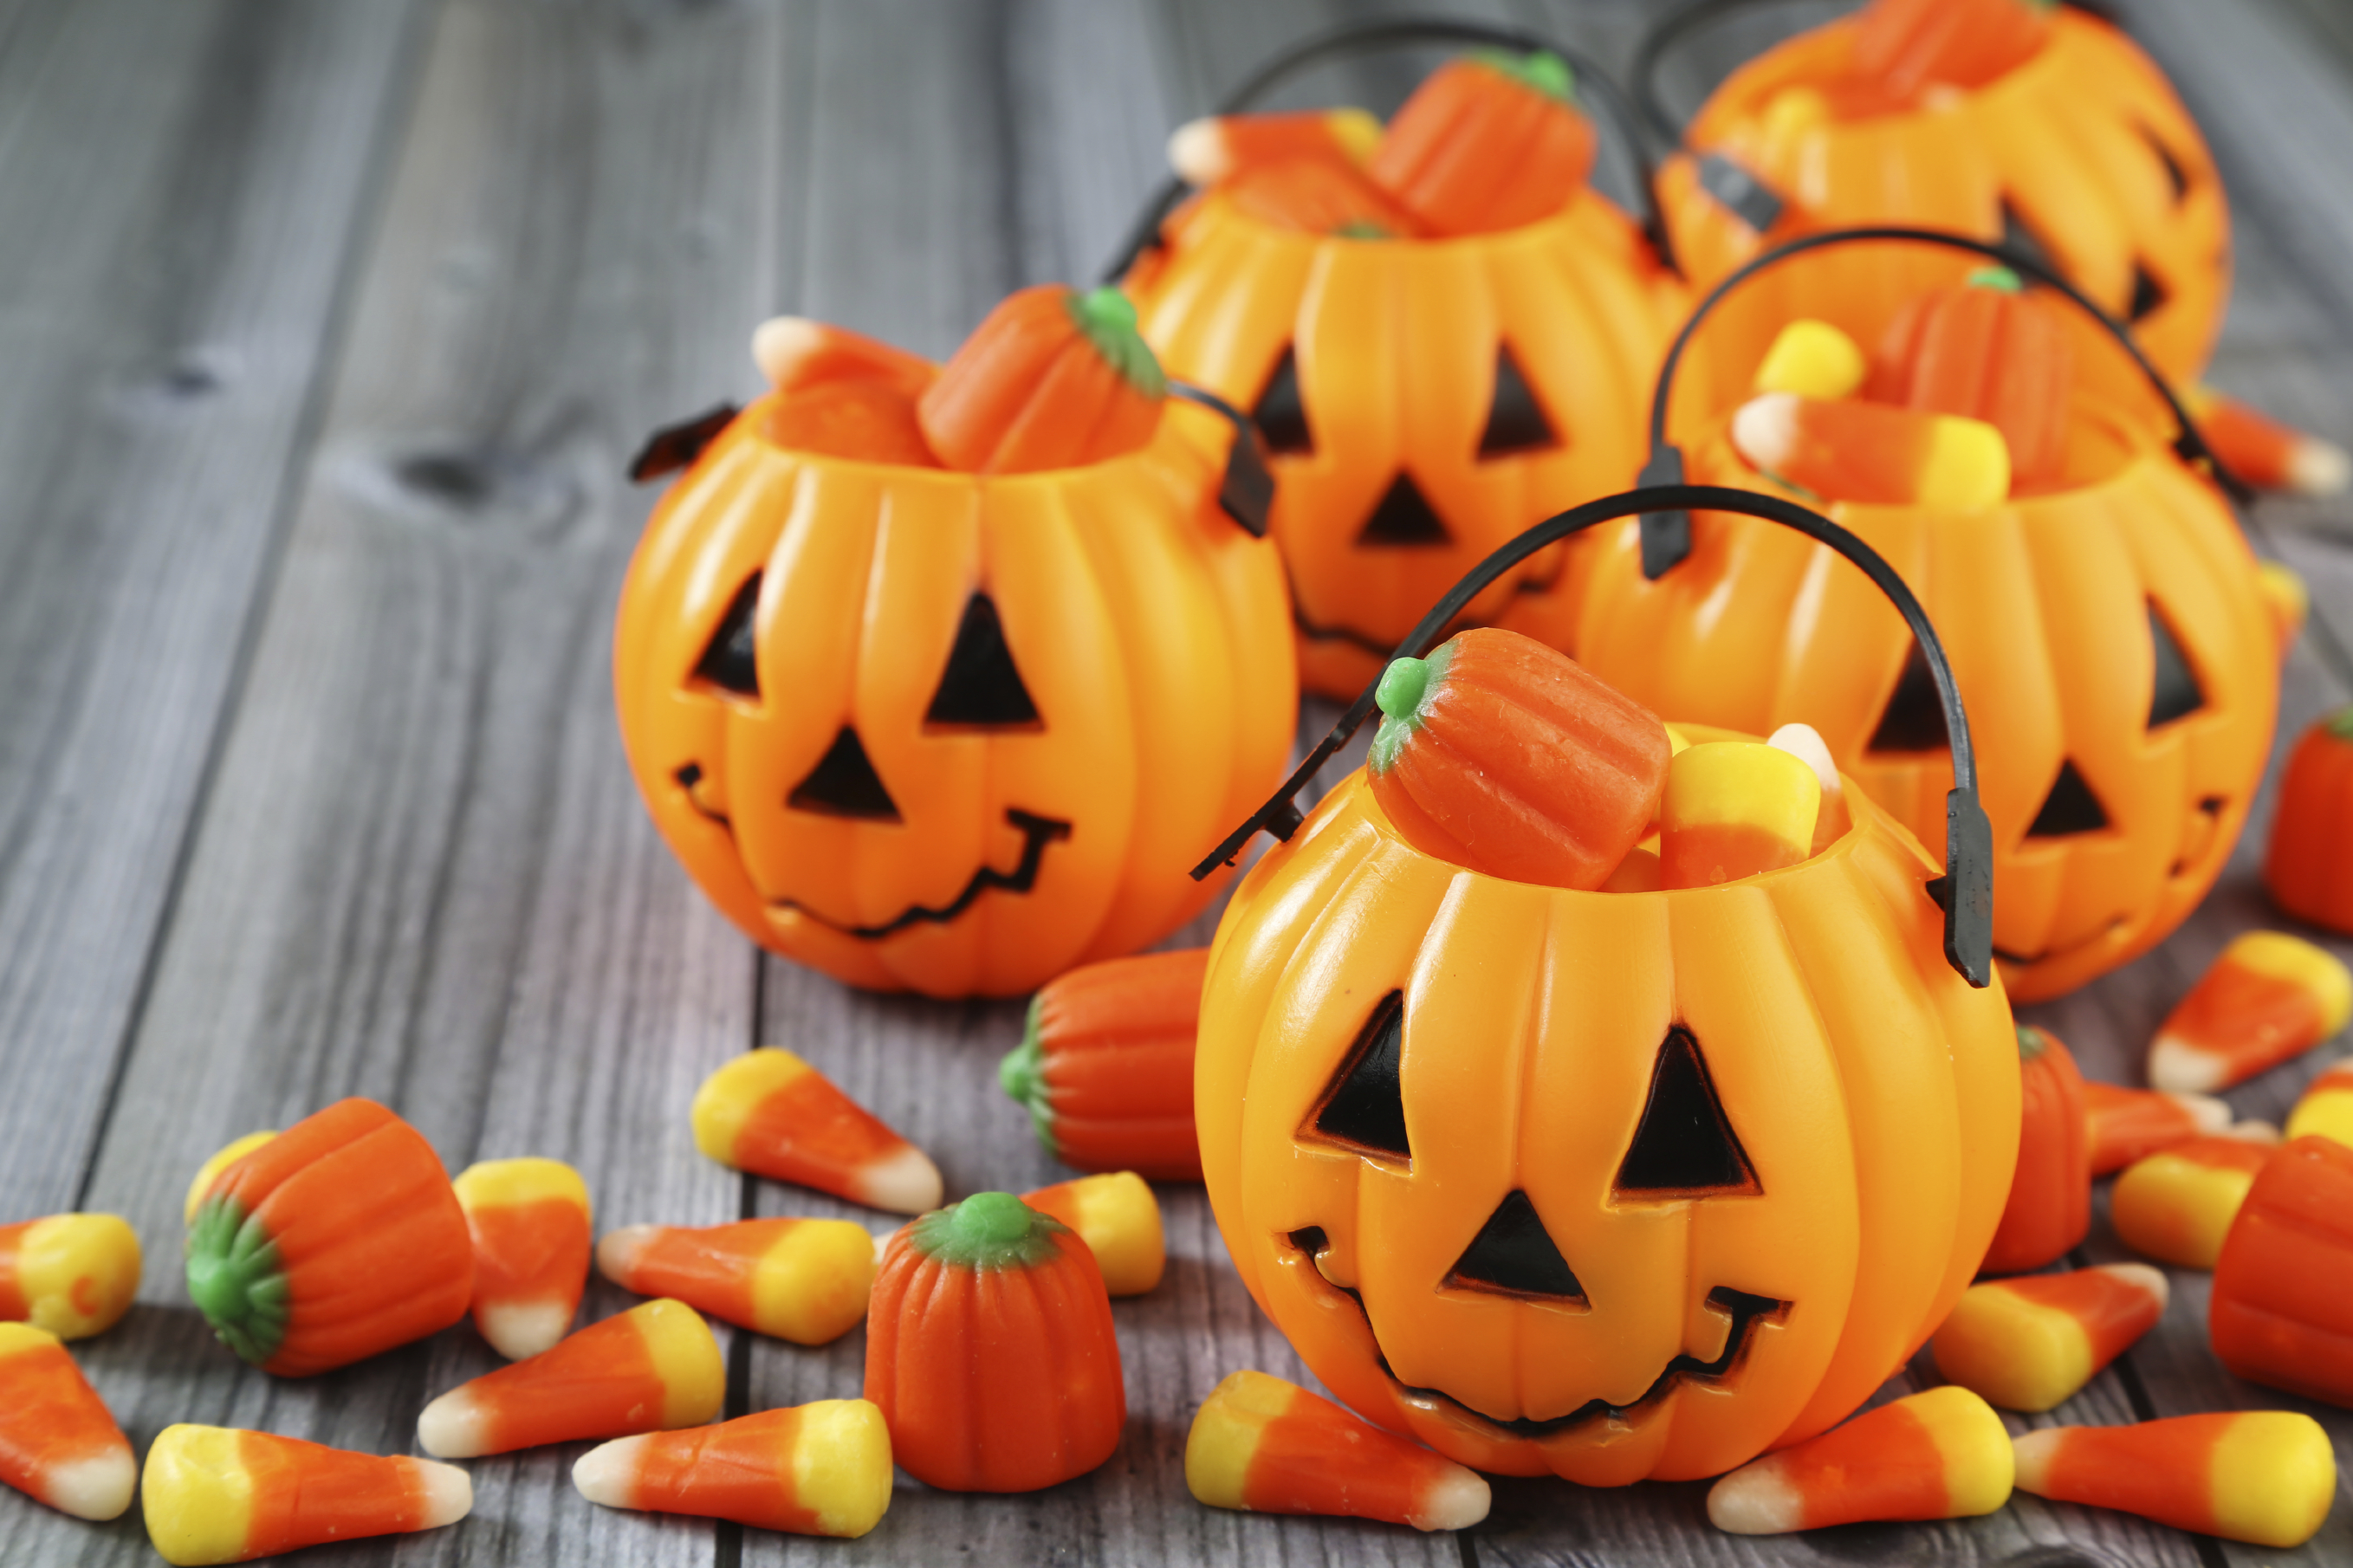

### Table of Contents

- 1. [Problem statement](#section1)<br>
- 2. [Importing Packages](#section2) <br>
- 3. [Data Loading and Description](#section3)<br>
- 4. [Exploratory Data Analysis](#section4) <br>
- 5. [Machine Learning Algorithms for making a model](#section5) <br>
    - 5.1 [Linear Regression](#section501) <br>
        - 5.1.1 [Checking the assumptions of Linear Regression](#section50101) <br>
        - 5.1.2 [Preparing X and Y using pandas](#section50102) <br>
        - 5.1.3 [Splitting X and Y into train and test datasets](#section50103) <br>
        - 5.1.4 [Interpreting Model Coefficients](#section50104) <br>
        - 5.1.5 [Using the model for prediction](#section50105) <br>
        - 5.1.6 [Model Evaluation](#section50106) <br>
        - 5.1.7 [Observation](#section50107) <br>
    - 5.2 [Decision Tree](#section502) <br>
        - 5.2.1 [Preparing X and Y using pandas](#section50201) <br>
        - 5.2.2 [Splitting X and Y into train and test datasets](#section50202) <br>
        - 5.2.3 [Plotting our model on decision tree](#section50203) <br>
        - 5.2.4 [Using the model for prediction](#section50204) <br>
        - 5.2.5 [Model Evaluation](#section50205) <br>
        - 5.2.6 [Observation](#section50206) <br>
    - 5.3 [Random Forest](#section503) <br>
        - 5.3.1 [Preparing X and Y using pandas](#section50301) <br>
        - 5.3.2 [Splitting X and Y into train and test datasets](#section50302) <br>
        - 5.3.3 [Model with and without parameter specification](#section50303) <br>
        - 5.3.4 [Using the model for prediction](#section50304) <br>
        - 5.3.5 [Model Evaluation](#section50305) <br>
        - 5.3.6 [Observation](#section50306) <br>
- 6. [Conclusion](#section6) <br>

<a id=section1></a> 
## 1. Problem statement

Each row in the candy dataset corresponds to one type of Halloween candy. Participants are shown different candies two at time and are asked which candy do they prefer. After aggregating all the votes, each candy is given winpercent.
Winpercent is the overall win percentage according to 269,000 matchups. 

Here we are asked to **make a model which would help us predict the winpercentage of a candy basis it's various other characteristics**.

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline                              

from sklearn import metrics

<a id=section3></a>
## 3. Data Loading and Description

In [3]:
Candy_df = pd.read_csv('C:/Users/kanvi/Desktop/INSAID/Term 3/Project/candy-data.csv')
Candy_df.head()

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465

### Description of the dataset

Each row in the candy dataset corresponds to one type of Halloween candy. Participants are shown different candies two at time and are asked which candy do they prefer. After aggregating all the votes, each candy is given winpercent.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| competitorname                 | Name of the candy                                                                          |
| chocolate                      | Does it contain chocolate?                                                                 | 
| fruity                         | Is it fruit flavored?                                                                      | 
| caramel                        | Is there caramel in the candy?                                                             |
| peanutalmondy                  | Does it contain peanuts, peanut butter or almonds?                                         |  | nougat                         | Does it contain nougat?                                                                    |
| crispedricewafer               | Does it contain crisped rice, wafers, or a cookie component?                               |
| hard                           | Is it a hard candy?                                                                        |
| bar                            | Is it a candy bar?                                                                         |
| pluribus                       | Is it one of many candies in a bag or box?                                                 |
| sugarpercent                   | The percentile of sugar it falls under within the data set.                                | 
| pricepercent                   | The unit price percentile compared to the rest of the set.                                 |
| winpercent                     | The overall win percentage according to 269,000 matchups.                                  |

<a id=section4> </a>
## 4. Exploratory Data Analysis

In [10]:
Candy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.4+ KB


In [5]:
Candy_df.describe(include='all')

competitorname  chocolate     fruity    caramel  peanutyalmondy  \
count                   85  85.000000  85.000000  85.000000       85.000000   
unique                  85        NaN        NaN        NaN             NaN   
top     Boston Baked Beans        NaN        NaN        NaN             NaN   
freq                     1        NaN        NaN        NaN             NaN   
mean                   NaN   0.435294   0.447059   0.164706        0.164706   
std                    NaN   0.498738   0.500140   0.373116        0.373116   
min                    NaN   0.000000   0.000000   0.000000        0.000000   
25%                    NaN   0.000000   0.000000   0.000000        0.000000   
50%                    NaN   0.000000   0.000000   0.000000        0.000000   
75%                    NaN   1.000000   1.000000   0.000000        0.000000   
max                    NaN   1.000000   1.000000   1.000000        1.000000   

           nougat  crispedricewafer       hard        bar   pluribus  \
count   85.000000         85.000000  85.000000  85.000000  85.000000   
unique        NaN               NaN        NaN        NaN        NaN   
top           NaN               NaN        NaN        NaN        NaN   
freq          NaN               NaN        NaN        NaN        NaN   
mean     0.082353          0.082353   0.176471   0.247059   0.517647   
std      0.276533          0.276533   0.383482   0.433861   0.502654   
min      0.000000          0.000000   0.000000   0.000000   0.000000   
25%      0.000000          0.000000   0.000000   0.000000   0.000000   
50%      0.000000          0.000000   0.000000   0.000000   1.000000   
75%      0.000000          0.000000   0.000000   0.000000   1.000000   
max      1.000000          1.000000   1.000000   1.000000   1.000000   

        sugarpercent  pricepercent  winpercent  
count      85.000000     85.000000   85.000000  
unique           NaN           NaN         NaN  
top              NaN           NaN         NaN  
freq             NaN           NaN         NaN  
mean        0.478647      0.468882   50.316764  
std         0.282778      0.285740   14.714357  
min         0.011000      0.011000   22.445341  
25%         0.220000      0.255000   39.141056  
50%         0.465000      0.465000   47.829754  
75%         0.732000      0.651000   59.863998  
max         0.988000      0.976000   84.180290

In [6]:
Candy_dfc = Candy_df.copy(deep=True)

In [7]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(Candy_dfc)
profile.to_file('Candy_dfc_post_profiling_report.html')

**Observations**
- There are a total of **13 variables** with a total number of **85 observations**.
- There are **no missing values** in our dataset.
- All the values are **unique and distinct**.
- **3 variables** (sugarpercent, pricepercent and winpercent) are of the type **numerical**, **1**(competitorname) of the type **categorical** and all the rest **9 variables** are of the type **boolean**.
- There is almost an **equal % of with and without chocolate candies**.
- **Similar** is the case with **fruity candies**.
- **More than 70%** of the candies **have caramel, peanutyalmondy, nougat, crispedricewafer and hard nature**.
- **64%** of the candies are **bar candies**.
- There is an **average of 48% sugar** in the candies. The **range** of sugar% goes from **1.1% to 99%**. **ReeseÃ•s stuffed with pieces** being the candy with the **highest sugar%** and **One dime** and **One quarter** with the **lowest sugar%**.
- The **average price of candy is 47%**. The **range** of price% goes from **1.1% to 98%**. **Nik L Nip** and **Nestle Smarties** being the candy with the **highest price%** and **Tootsie Roll Midgies** with the **lowest price%**.
- **ReeseÃ•s Peanut Butter cup** has the **highest win%** whereas **Nik L Nip** has the **lowest win**%.
- Candies with the **highest win%** are all **chocolaty, have peanuts and almonds, are candy bars, have slightly more than average sugar% and price%**.

<a id=section5> </a>
## 5. Machine Learning Algorithms for making a model

<a id=section501></a>
### 5.1 Linear Regression

<a id=section50101></a>
#### 5.1.1 Checking the assumptions of Linear Regression

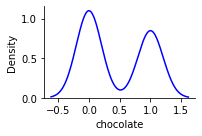

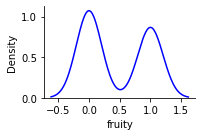

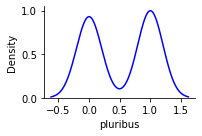

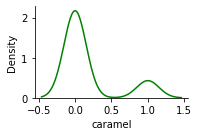

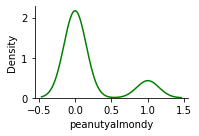

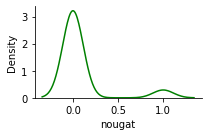

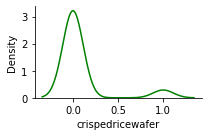

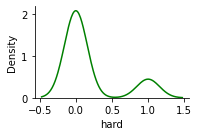

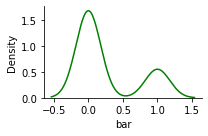

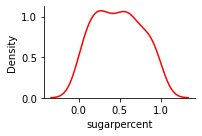

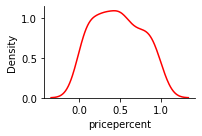

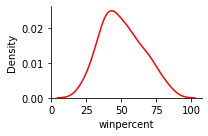

In [8]:
## Assumption 1 - Checking if the variables are normally distributed

sns.displot(Candy_dfc.chocolate, color='blue', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.fruity, color='blue', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.pluribus, color='blue', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.caramel, color='green', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.peanutyalmondy, color='green', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.nougat, color='green', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.crispedricewafer, color='green', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.hard, color='green', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.bar, color='green', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.sugarpercent, color='red', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.pricepercent, color='red', kind='kde', height=2, aspect=1.5)
sns.displot(Candy_dfc.winpercent, color='red', kind='kde', height=2, aspect=1.5)

**Observations**
- Sugarpercent, Pricepercent and Winpercent are almost normally distributed.
- Pluribus, Fruity and Chocolate are uniformly distributed .
- Hard, Bar, Crispedricewafer, Nougat, Peanutyalmondy, Caramel are all rightly skewed.

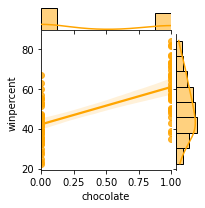

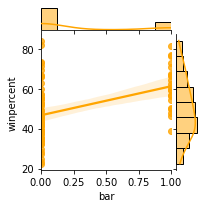

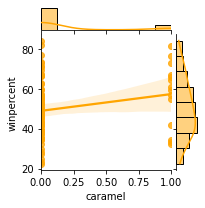

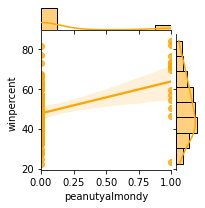

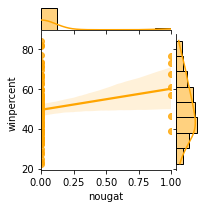

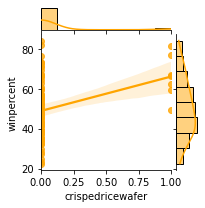

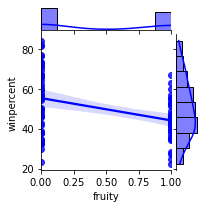

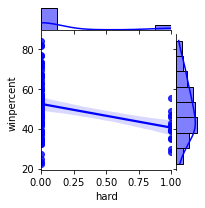

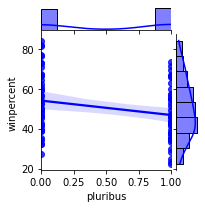

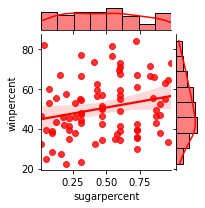

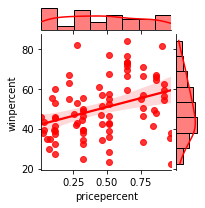

In [8]:
## Assumption 2 - Checking if there is any linear relationship between target variable and independent variables. 

sns.jointplot(y = 'winpercent', x = 'chocolate', data=Candy_dfc, kind='reg', height = 3, color = 'orange')
sns.jointplot(y = 'winpercent', x = 'bar', data=Candy_dfc, kind='reg', height = 3, color = 'orange')
sns.jointplot(y = 'winpercent', x = 'caramel', data=Candy_dfc, kind='reg', height = 3, color = 'orange')
sns.jointplot(y = 'winpercent', x = 'peanutyalmondy', data=Candy_dfc, kind='reg', height = 3, color = 'orange')
sns.jointplot(y = 'winpercent', x = 'nougat', data=Candy_dfc, kind='reg', height = 3, color = 'orange')
sns.jointplot(y = 'winpercent', x = 'crispedricewafer', data=Candy_dfc, kind='reg', height = 3, color = 'orange')
sns.jointplot(y = 'winpercent', x = 'fruity', data=Candy_dfc, kind='reg', height = 3, color = 'blue')
sns.jointplot(y = 'winpercent', x = 'hard', data=Candy_dfc, kind='reg', height = 3, color = 'blue')
sns.jointplot(y = 'winpercent', x = 'pluribus', data=Candy_dfc, kind='reg', height = 3, color = 'blue')
sns.jointplot(y = 'winpercent', x = 'sugarpercent', data=Candy_dfc, kind='reg', height = 3, color = 'red')
sns.jointplot(y = 'winpercent', x = 'pricepercent', data=Candy_dfc, kind='reg', height = 3, color = 'red')

**Observations**
- Winpercent has linear relationship with all the variables. 
- In the case of sugarpercent and pricepercent, the variance between target variable and independent variable is huge.

<AxesSubplot:>

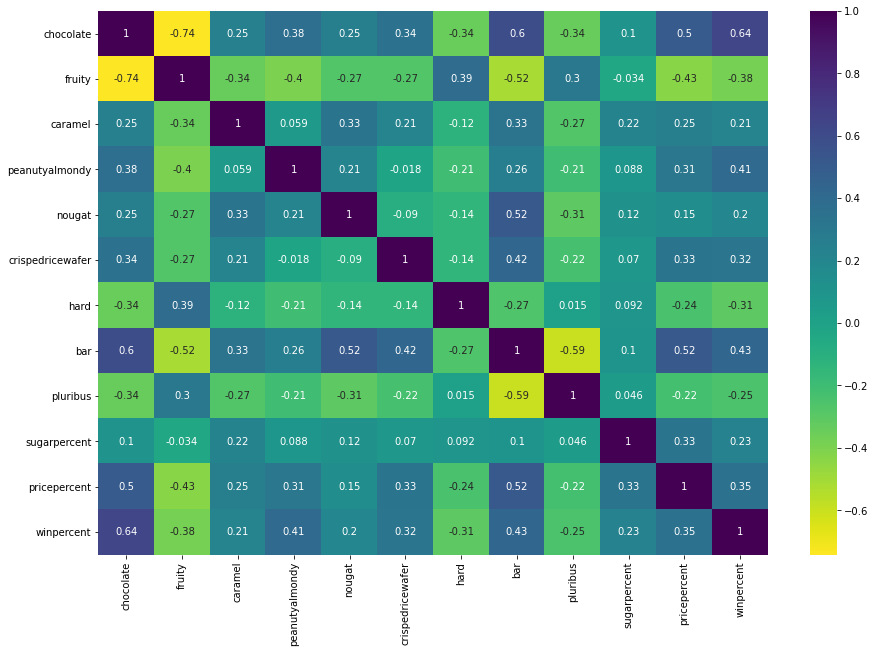

In [9]:
## Assumption 3 -  Checking if there is a correlation between independent variables

plt.figure(figsize = (15,10))
sns.heatmap(Candy_dfc.corr(), annot=True, cmap='viridis_r')

**Observations**
- High correlation between winpercent and chocolate, bar and peanutyalmondy.
- Low correlation between winpercent and fruity, winpercent and hard.
- Low correlation between fruity and chocolate.
- No correlation between most of the variables.

<a id=section50102></a>
#### 5.1.2  Preparing X and Y using pandas

In [11]:
from sklearn.preprocessing import StandardScaler

Candy_df_LR = Candy_df.set_index('competitorname')
Candy_df_LR.head()

chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                       
100 Grand               1       0        1               0       0   
3 Musketeers            1       0        0               0       1   
One dime                0       0        0               0       0   
One quarter             0       0        0               0       0   
Air Heads               0       1        0               0       0   

                crispedricewafer  hard  bar  pluribus  sugarpercent  \
competitorname                                                        
100 Grand                      1     0    1         0         0.732   
3 Musketeers                   0     0    1         0         0.604   
One dime                       0     0    0         0         0.011   
One quarter                    0     0    0         0         0.011   
Air Heads                      0     0    0         0         0.906   

                pricepercent  winpercent  
competitorname                            
100 Grand              0.860   66.971725  
3 Musketeers           0.511   67.602936  
One dime               0.116   32.261086  
One quarter            0.511   46.116505  
Air Heads              0.511   52.341465

In [12]:
scaler = StandardScaler().fit(Candy_df_LR)
Candy_df_LR_n = scaler.transform(Candy_df_LR)


Candy_df_LR = pd.DataFrame(Candy_df_LR_n)
Candy_df_LR.columns = ['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar',
                           'pluribus','sugarpercent','pricepercent','winpercent']
Candy_df_LR.head()

chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0   1.138990 -0.899172  2.251983       -0.444053 -0.299572          3.338092   
1   1.138990 -0.899172 -0.444053       -0.444053  3.338092         -0.299572   
2  -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
3  -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
4  -0.877971  1.112134 -0.444053       -0.444053 -0.299572         -0.299572   

      hard       bar  pluribus  sugarpercent  pricepercent  winpercent  
0 -0.46291  1.745743  -1.03594      0.901261      1.376914    1.138603  
1 -0.46291  1.745743  -1.03594      0.445922      0.148273    1.181755  
2 -0.46291 -0.572822  -1.03594     -1.663576     -1.242308   -1.234361  
3 -0.46291 -0.572822  -1.03594     -1.663576      0.148273   -0.287147  
4 -0.46291 -0.572822  -1.03594      1.520236      0.148273    0.138417

In [13]:
Ind_var = ['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar',
                           'pluribus','sugarpercent','pricepercent']
X = Candy_df_LR[Ind_var]
X.head(2)

chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0    1.13899 -0.899172  2.251983       -0.444053 -0.299572          3.338092   
1    1.13899 -0.899172 -0.444053       -0.444053  3.338092         -0.299572   

      hard       bar  pluribus  sugarpercent  pricepercent  
0 -0.46291  1.745743  -1.03594      0.901261      1.376914  
1 -0.46291  1.745743  -1.03594      0.445922      0.148273

In [14]:
X.shape

(85, 11)

In [15]:
Y = Candy_df_LR['winpercent']
Y.head()

0    1.138603
1    1.181755
2   -1.234361
3   -0.287147
4    0.138417
Name: winpercent, dtype: float64

In [16]:
Y.shape

(85,)

<a id=section50103></a>
#### 5.1.3 Splitting X and Y into train and test datasets

In [17]:
from sklearn.model_selection import train_test_split

def split(X,Y):
    return train_test_split(X, Y, test_size=0.20, random_state=1)

In [18]:
X_train, X_test, Y_train, Y_test=split(X,Y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('Y_test shape: ',Y_test.shape)

Train cases as below
X_train shape:  (68, 11)
Y_train shape:  (68,)

Test cases as below
X_test shape:  (17, 11)
Y_test shape:  (17,)


In [19]:
X_train.head()              # To check if X got shuffled

chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
35   1.138990 -0.899172  2.251983       -0.444053 -0.299572         -0.299572   
68  -0.877971  1.112134 -0.444053       -0.444053 -0.299572         -0.299572   
45  -0.877971  1.112134 -0.444053       -0.444053 -0.299572         -0.299572   
19  -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
79   1.138990 -0.899172  2.251983       -0.444053 -0.299572          3.338092   

       hard       bar  pluribus  sugarpercent  pricepercent  
35 -0.46291 -0.572822  0.965307     -0.628392      0.148273  
68 -0.46291 -0.572822  0.965307     -1.165549     -0.876180  
45 -0.46291 -0.572822  0.965307     -0.920093     -0.506532  
19 -0.46291 -0.572822  0.965307     -0.048547     -0.013668  
79 -0.46291  1.745743 -1.035940      0.239597      1.538855

<a id=section50104></a>
#### 5.1.4 Interpreting Model Coefficients

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(regressor.intercept_)
print(regressor.coef_)

-0.014053601759251117
[ 0.64148463  0.2736618  -0.09094637  0.21432066  0.14910735  0.30066298
 -0.16499145 -0.13965352 -0.09623747  0.2197424  -0.01498591]


In [22]:
Ind_var.insert(0,'intercept')
Ind_var

['intercept',
 'chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent']

In [23]:
Coeff = regressor.coef_.tolist()
Coeff.insert(0,regressor.intercept_)
Coeff

[-0.014053601759251117,
 0.6414846268043084,
 0.273661798575635,
 -0.0909463696878414,
 0.21432065537391715,
 0.14910734785942698,
 0.3006629762434159,
 -0.16499144568460664,
 -0.13965351855660613,
 -0.0962374660889202,
 0.219742397499574,
 -0.014985912183141437]

In [24]:
eq1 = zip(Ind_var, Coeff)

for c1, c2 in eq1:
    print(c1, c2)

intercept -0.014053601759251117
chocolate 0.6414846268043084
fruity 0.273661798575635
caramel -0.0909463696878414
peanutyalmondy 0.21432065537391715
nougat 0.14910734785942698
crispedricewafer 0.3006629762434159
hard -0.16499144568460664
bar -0.13965351855660613
pluribus -0.0962374660889202
sugarpercent 0.219742397499574
pricepercent -0.014985912183141437


<a id=section50105></a>
#### 5.1.5 Using the model for prediction

In [25]:
Y_pred_train = regressor.predict(X_train)
Y_pred_test = regressor.predict(X_test)

<a id=section50106></a>
#### 5.1.6 Model Evaluation

In [28]:
from sklearn.metrics import r2_score

In [29]:
MAE_train = metrics.mean_absolute_error(Y_train,Y_pred_train)
MSE_train = metrics.mean_squared_error(Y_train,Y_pred_train)
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train))
r2_score_train = r2_score(Y_train, Y_pred_train)
print('MAE for train is {}'.format(MAE_train))
print('MSE for train is {}'.format(MSE_train))
print('RMSE for train is {}'.format(RMSE_train))
print('r2 score for train is {}'.format(r2_score_train))

MAE for train is 0.5221664597120741
MSE for train is 0.4216166059906193
RMSE for train is 0.6493201105699863
r2 score for train is 0.585512991938315


In [30]:
MAE_test = metrics.mean_absolute_error(Y_test,Y_pred_test)
MSE_test = metrics.mean_squared_error(Y_test,Y_pred_test)
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))
r2_score_test = r2_score(Y_test, Y_pred_test)
print('MAE for test is {}'.format(MAE_test))
print('MSE for test is {}'.format(MSE_test))
print('RMSE for test is {}'.format(RMSE_test))
print('r2 score for test is {}'.format(r2_score_test))

MAE for test is 0.7153730732824464
MSE for test is 0.7807432578358298
RMSE for test is 0.8835967733281
r2 score for test is 0.1611961264082321


In [31]:
Score_LR = regressor.score(X_test, Y_test)
print("Accuracy= ", (Score_LR * 100), "%")

Accuracy=  16.11961264082321 %


<a id=section50107></a>
#### 5.1.7 Observations

- Since the RMSE score caters to error, hence RMSE score close is 0 is best. 
- But here we can see that our model's RMSE score(when tested) is coming out to be very high, almost close to 1.
- In addition to this, if we compare our RMSE score for train and test dataset, then also the error while testing is high than the error in training which means our model is overfitting the data.
- If we consider r2 score, for which close to 1 is good; we can see that here in our model, this score is coming out to be close to 0 infact; which further means our regreesion model is not a very good model for predicting our winpercent.

<a id=section502></a>
### 5.2 Decision tree

<a id=section50201></a>
#### 5.2.1  Preparing X and Y using pandas

In [32]:
from sklearn import tree

Candy_df_DT = Candy_df.set_index('competitorname')
Candy_df_DT.head()

chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                       
100 Grand               1       0        1               0       0   
3 Musketeers            1       0        0               0       1   
One dime                0       0        0               0       0   
One quarter             0       0        0               0       0   
Air Heads               0       1        0               0       0   

                crispedricewafer  hard  bar  pluribus  sugarpercent  \
competitorname                                                        
100 Grand                      1     0    1         0         0.732   
3 Musketeers                   0     0    1         0         0.604   
One dime                       0     0    0         0         0.011   
One quarter                    0     0    0         0         0.011   
Air Heads                      0     0    0         0         0.906   

                pricepercent  winpercent  
competitorname                            
100 Grand              0.860   66.971725  
3 Musketeers           0.511   67.602936  
One dime               0.116   32.261086  
One quarter            0.511   46.116505  
Air Heads              0.511   52.341465

In [36]:
Ind_var = ['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar',
                           'pluribus','sugarpercent','pricepercent']
X = Candy_df_DT[Ind_var]
X.head()

chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                       
100 Grand               1       0        1               0       0   
3 Musketeers            1       0        0               0       1   
One dime                0       0        0               0       0   
One quarter             0       0        0               0       0   
Air Heads               0       1        0               0       0   

                crispedricewafer  hard  bar  pluribus  sugarpercent  \
competitorname                                                        
100 Grand                      1     0    1         0         0.732   
3 Musketeers                   0     0    1         0         0.604   
One dime                       0     0    0         0         0.011   
One quarter                    0     0    0         0         0.011   
Air Heads                      0     0    0         0         0.906   

                pricepercent  
competitorname                
100 Grand              0.860  
3 Musketeers           0.511  
One dime               0.116  
One quarter            0.511  
Air Heads              0.511

In [37]:
Y = Candy_df_DT['winpercent']
Y.head()

competitorname
100 Grand       66.971725
3 Musketeers    67.602936
One dime        32.261086
One quarter     46.116505
Air Heads       52.341465
Name: winpercent, dtype: float64

<a id=section50202></a>
#### 5.2.2 Splitting X and Y into train and test datasets

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [39]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(68, 11)
(68,)
(17, 11)
(17,)


<a id=section50203></a>
#### 5.2.3 Plotting our model on decision tree

In [47]:
model = tree.DecisionTreeRegressor(random_state = 0)

In [48]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [49]:
import sys
import pydotplus
from IPython.display import Image

#!{sys.executable} -m pip install graphviz
#!{sys.executable} -m pip install pydotplus
#!{sys.executable} -m pip install Ipython

In [21]:
Dec_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(Dec_tree)

In [22]:
print(tree.export_text(model))

|--- feature_0 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- value: [46.12]
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- value: [46.30]
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- feature_9 <= 0.30
|   |   |   |   |   |--- value: [41.90]
|   |   |   |   |--- feature_9 >  0.30
|   |   |   |   |   |--- value: [32.23]
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_9 <= 0.39
|   |   |   |   |--- value: [23.42]
|   |   |   |--- feature_9 >  0.39
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_10 <= 0.39
|   |   |   |   |   |   |--- value: [38.01]
|   |   |   |   |   |--- feature_10 >  0.39
|   |   |   |   |   |   |--- feature_9 <= 0.71
|   |   |   |   |   |   |   |--- value: [34.16]
|   |   |   |   |   |   |--- feature_9 >  0.71
|   |   |   |   |   |   |   |--- value: [33.44]
|   |   |   |   |--- feature_6 >  0

<a id=section50204></a>
#### 5.2.4 Using the model for prediction

In [26]:
Y_pred_train = model.predict(X_train)  
Y_pred_test = model.predict(X_test)

<a id=section50205></a>
#### 5.2.5 Model Evaluation

In [40]:
from sklearn.metrics import r2_score

In [43]:
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train))
r2_score_train = r2_score(Y_train, Y_pred_train)

print('RMSE for train is {}'.format(RMSE_train))
print('r2 score for train is {}'.format(r2_score_train))

RMSE for train is 52.33392147866652
r2 score for train is -11.583944934432658


In [45]:
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))
r2_score_test = r2_score(Y_test, Y_pred_test)

print('RMSE for test is {}'.format(RMSE_test))
print('r2 score for test is {}'.format(r2_score_test))

RMSE for test is 51.97770646822402
r2 score for test is -12.565738687015372


In [50]:
Score = model.score(X_test, Y_test)
print("Accuracy= ", (Score * 100), "%")

Accuracy=  -34.142799644981416 %


<a id=section50206></a>
#### 5.2.6 Observations

- Our decision tree model's RMSE score(when tested) is coming out to be very very high.
- In addition to this, if we compare our RMSE score for train and test dataset, then also there is not much of a difference. The model is not learning the data well.
- r2 score is in negative which infact should be close to 1.

<a id=section503></a>
### 5.3 Random Forest 

<a id=section50301></a>
#### 5.3.1  Preparing X and Y using pandas

In [51]:
Candy_df_RF = Candy_df.set_index('competitorname')
Candy_df_RF.head()

chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                       
100 Grand               1       0        1               0       0   
3 Musketeers            1       0        0               0       1   
One dime                0       0        0               0       0   
One quarter             0       0        0               0       0   
Air Heads               0       1        0               0       0   

                crispedricewafer  hard  bar  pluribus  sugarpercent  \
competitorname                                                        
100 Grand                      1     0    1         0         0.732   
3 Musketeers                   0     0    1         0         0.604   
One dime                       0     0    0         0         0.011   
One quarter                    0     0    0         0         0.011   
Air Heads                      0     0    0         0         0.906   

                pricepercent  winpercent  
competitorname                            
100 Grand              0.860   66.971725  
3 Musketeers           0.511   67.602936  
One dime               0.116   32.261086  
One quarter            0.511   46.116505  
Air Heads              0.511   52.341465

In [52]:
Ind_var = ['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar',
                           'pluribus','sugarpercent','pricepercent']
X = Candy_df_RF[Ind_var]
X.head(2)

chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                       
100 Grand               1       0        1               0       0   
3 Musketeers            1       0        0               0       1   

                crispedricewafer  hard  bar  pluribus  sugarpercent  \
competitorname                                                        
100 Grand                      1     0    1         0         0.732   
3 Musketeers                   0     0    1         0         0.604   

                pricepercent  
competitorname                
100 Grand              0.860  
3 Musketeers           0.511

In [53]:
Y = Candy_df_RF['winpercent']
Y.head()

competitorname
100 Grand       66.971725
3 Musketeers    67.602936
One dime        32.261086
One quarter     46.116505
Air Heads       52.341465
Name: winpercent, dtype: float64

<a id=section50302></a>
#### 5.3.2 Splitting X and Y into train and test datasets

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [55]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(68, 11)
(68,)
(17, 11)
(17,)


<a id=section50303></a>
#### 5.3.3 Model with and without parameter specification

**Model without parameter specification**

In [138]:
from sklearn.ensemble import RandomForestRegressor

model_RF_NP = RandomForestRegressor(random_state = 0)

model_RF_NP.fit(X_train, Y_train)

F:\softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

**Model with parameter specification**

In [139]:
model_RF_P = RandomForestRegressor(random_state = 0, n_estimators = 15, min_samples_split = 25, min_samples_leaf = 2)

model_RF_P.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=25,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

<a id=section50304></a>
#### 5.3.4 Using the model for prediction

In [140]:
Y_pred_train_NP = model_RF_NP.predict(X_train)  
Y_pred_test_NP = model_RF_NP.predict(X_test)

Y_pred_train_P = model_RF_P.predict(X_train)  
Y_pred_test_P = model_RF_P.predict(X_test)

<a id=section50305></a>
#### 5.3.5 Model Evaluation

**Without Parameter specification**

In [141]:
RMSE_train_NP = np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train_NP))
r2_score_train_NP = r2_score(Y_train, Y_pred_train_NP)

print('RMSE for train without parameter specification is {}'.format(RMSE_train_NP))
print('r2 score for train without parameter specification is {}'.format(r2_score_train_NP))

RMSE for train without parameter specification is 4.9487344924086525
r2 score for train without parameter specification is 0.8874777105624468


In [142]:
RMSE_test_NP = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test_NP))
r2_score_test_NP = r2_score(Y_test, Y_pred_test_NP)

print('RMSE for test without parameter specification is {}'.format(RMSE_test_NP))
print('r2 score for test without parameter specification is {}'.format(r2_score_test_NP))

RMSE for test without parameter specification is 13.624219429203517
r2 score for test without parameter specification is 0.06796444060654172


In [143]:
Score_NP = model_RF_NP.score(X_test, Y_test)
print("Accuracy= ", (Score_NP * 100), "%")

Accuracy=  6.7964440606541725 %


**With parameter specifications**

In [144]:
RMSE_train_P = np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train_P))
r2_score_train_P = r2_score(Y_train, Y_pred_train_P)

print('RMSE for train with parameter specification is {}'.format(RMSE_train_P))
print('r2 score for train with parameter specification is {}'.format(r2_score_train_P))

RMSE for train with parameter specification is 10.801592891984434
r2 score for train with parameter specification is 0.4639246201296172


In [145]:
RMSE_test_P = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test_P))
r2_score_test_P = r2_score(Y_test, Y_pred_test_P)

print('RMSE for test with parameter specification is {}'.format(RMSE_test_P))
print('r2 score for test with parameter specification is {}'.format(r2_score_test_P))

RMSE for test with parameter specification is 10.927933346224568
r2 score for test with parameter specification is 0.4003673149891388


In [146]:
Score_P = model_RF_P.score(X_test, Y_test)
print("Accuracy= ", (Score_P * 100), "%")

Accuracy=  40.03673149891389 %


<a id=section50306></a>
#### 5.3.6 Observations

**Without parameter specification**
- RMSE is coming out to be very high again.
- In addition to this, if we compare our RMSE score for train and test dataset, then also there is overfitting of data that is happening since RMSE of test dataset is more than the train dataset.
- r2 score for train dataset is good but for test it's again very low.
- Accuracy is also of just 7%

**With parameter specification**
- Significant improvement as compared to without parameter specification.
- RMSE is high but lower than without parameter specification.
- RMSE score for train and test dataset is almost equal.
- r2 score is also high as compared to without parameter specification.
- Accuracy has also increased to 40%